# ML Mini-Experiment: Anomaly Detection in DeFi Staking Behavior

## Objective
To identify abnormal staking behavior using unsupervised machine learning techniques for DeFi security analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

## Features Used

- Stake Amount
- Stake Duration
- Stake Frequency
- Reward Claims
- Average Gap Between Stakes

These features represent user staking behavior and are useful for identifying suspicious or automated activity.

In [2]:
np.random.seed(42)

normal_users = 500

data = {
    "stake_amount": np.random.normal(500, 200, normal_users).clip(50, 2000),
    "stake_duration": np.random.normal(30, 15, normal_users).clip(1, 180),
    "stake_frequency": np.random.poisson(5, normal_users),
    "reward_claims": np.random.poisson(3, normal_users),
    "avg_gap_between_stakes": np.random.normal(10, 5, normal_users).clip(1, 60)
}

normal_df = pd.DataFrame(data)

anomalies = {
    "stake_amount": np.random.normal(3000, 500, 20),
    "stake_duration": np.random.normal(2, 1, 20),
    "stake_frequency": np.random.poisson(40, 20),
    "reward_claims": np.random.poisson(30, 20),
    "avg_gap_between_stakes": np.random.normal(1, 0.5, 20)
}

anomaly_df = pd.DataFrame(anomalies)

df = pd.concat([normal_df, anomaly_df], ignore_index=True)
df.head()

,stake_amount,stake_duration,stake_frequency,reward_claims,avg_gap_between_stakes
0,599.342831,43.892663,4,4,21.027648
1,472.347140,58.641250,7,2,15.996684
2,629.537708,9.021486,7,3,3.704672
3,804.605971,38.444539,2,2,13.935083
4,453.169325,20.240361,5,5,15.118882


## Data Preprocessing
Standardization is applied to normalize feature scales.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## Model Selection
Isolation Forest is used for unsupervised anomaly detection.

In [4]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

model.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [5]:
df["anomaly_score"] = model.decision_function(X_scaled)
df["anomaly"] = model.predict(X_scaled)

df[df["anomaly"] == -1].head()

,stake_amount,stake_duration,stake_frequency,reward_claims,avg_gap_between_stakes,anomaly_score,anomaly
141,761.428551,55.035323,8,6,20.272442,-0.031936,-1
209,1270.546298,55.446846,8,4,15.992663,-0.039629,-1
220,962.931713,34.617027,0,0,4.161741,-0.029252,-1
262,50.000000,68.401268,8,2,10.526299,-0.026518,-1
347,218.507245,66.829502,4,4,1.375416,-0.004195,-1


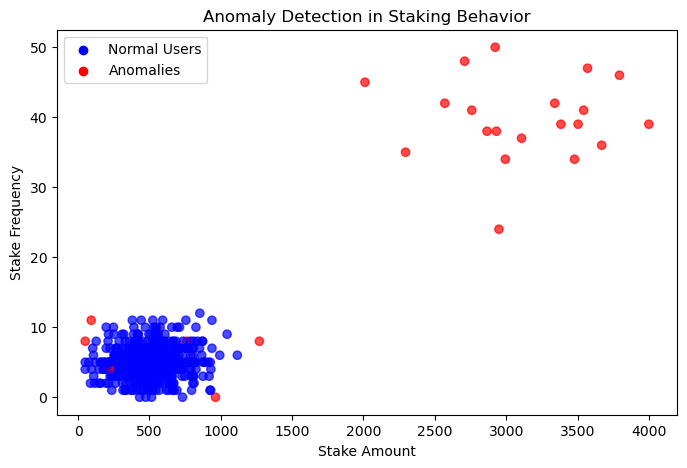

In [ ]:
colors = df["anomaly"].map({
    1: "blue",   
    -1: "red"     
})

plt.figure(figsize=(8, 5))
plt.scatter(
    df["stake_amount"],
    df["stake_frequency"],
    c=colors,
    alpha=0.7
)

plt.xlabel("Stake Amount")
plt.ylabel("Stake Frequency")
plt.title("Anomaly Detection in Staking Behavior")

plt.scatter([], [], c="blue", label="Normal Users")
plt.scatter([], [], c="red", label="Anomalies")
plt.legend()

plt.show()


## Results

The model identified approximately 5% of users as anomalous.  
These users exhibit unusually high staking frequency, short staking duration, and excessive reward claims.

Such patterns may indicate automated bots or reward exploitation behavior.